In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Tue, 11 Jun 2024 14:22


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format
index_map = {0:'Rest', 1:'City of SeaTac', 'All':'All', 'TOTAL':'TOTAL'}

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"28,691,420","30,256,357","1,564,938",5.45%
Arterial,"27,316,992","25,216,108","-2,100,884",-7.69%
Collector,"4,700,740","3,884,487","-816,253",-17.36%
Ramp,"858,867","708,026","-150,841",-17.56%
Total,"61,568,019","60,064,979","-1,503,040",-2.44%


#### Daily | By Facility Type - City of SeaTac

In [6]:
df1 = df[df['subarea_flag']==1]

In [7]:
_df = df1.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df = _df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total']).fillna(0)
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/np.maximum(_df['observed'],1)
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"1,588,271","1,614,663","26,393",1.66%
Arterial,"1,526,685","1,465,860","-60,826",-3.98%
Collector,"310,457","247,891","-62,566",-20.15%
Ramp,"102,265","54,080","-48,185",-47.12%
Total,"3,527,678","3,382,493","-145,185",-4.12%


#### Daily | By Facility Type - Other Counties

In [8]:
df2 = df[df['subarea_flag'] != 1]

In [9]:
_df = df2.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"27,103,149","28,641,694","1,538,545",5.68%
Arterial,"25,790,307","23,750,249","-2,040,058",-7.91%
Collector,"4,390,283","3,636,597","-753,686",-17.17%
Ramp,"756,602","653,946","-102,656",-13.57%
Total,"58,040,341","56,682,485","-1,357,856",-2.34%


----
### Daily | By County

In [10]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"33,478,633","33,303,661","-174,972",-0.52%
Kitsap,"4,567,541","3,851,843","-715,698",-15.67%
Pierce,"13,921,938","13,627,838","-294,100",-2.11%
Snohomish,"9,599,907","9,281,636","-318,271",-3.32%
Total,"61,568,019","60,064,979","-1,503,040",-2.44%


---
### City of SeaTac

In [11]:
index_map = {0:'Other', 1:'City of SeaTac'}
_df = df.groupby('subarea_flag').sum()[['observed','modeled']]
_df = _df.sort_index(ascending=False)
_df.index = _df.index.map(index_map)
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
subarea_flag,,,,
City of SeaTac,"3,527,678","3,382,493","-145,185",-4.12%
Other,"58,040,341","56,682,485","-1,357,856",-2.34%
Total,"61,568,019","60,064,979","-1,503,040",-2.44%


----
### Daily | By Volume

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_by_flow.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')
df['diff'] = df['modeled']-df['observed']
df['diff2'] = df['diff']**2
volume_bins = ['>=0 & <10,000', '>=10,000 & < 25,000', '>=25,000 & <50,000', '>=50,000 & <100,000', '>=100,000', 'Total']
df['volume_bins'] = df['volbin'].map(pd.Series(volume_bins, dtype='category')).cat.reorder_categories(volume_bins, ordered=True)
_df = df.groupby('volume_bins', sort=True).agg({'modeled':'sum', 'observed':'sum', 'nlinks':'count', 'diff2':'sum'}).reset_index().set_index('volume_bins')
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df['rmse'] = ((_df['diff2']/(_df['nlinks']-1))**0.5)/(_df['observed']/_df['nlinks'])
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df[['rmse']] = _df[['rmse']].applymap(format_percent)
_df.drop(columns='diff2').rename(columns={'nlinks':'ncounts'})[['observed', 'modeled', 'ncounts', 'diff', 'percent_diff', 'rmse']]


,observed,modeled,ncounts,diff,percent_diff,rmse
volume_bins,,,,,,
">=0 & <10,000","11,646,170","8,153,015","1,843","-3,493,155",-29.99%,62.28%
">=10,000 & < 25,000","14,527,999","13,881,748",870,"-646,251",-4.45%,36.61%
">=25,000 & <50,000","13,659,304","14,341,518",406,"682,214",4.99%,23.82%
">=50,000 & <100,000","16,571,948","18,017,243",250,"1,445,295",8.72%,18.23%
">=100,000","5,162,598","5,671,455",49,"508,856",9.86%,13.68%
Total,"61,568,019","60,064,979","3,418","-1,503,040",-2.44%,34.68%


---
### City of SeaTac

In [13]:
_df = df[df.subarea_flag==1].groupby('volume_bins', sort=True).agg({'modeled':'sum', 'observed':'sum', 'nlinks':'count', 'diff2':'sum'}).reset_index().set_index('volume_bins')
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df['rmse'] = ((_df['diff2']/(_df['nlinks']-1))**0.5)/(_df['observed']/_df['nlinks'])
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df[['rmse']] = _df[['rmse']].applymap(format_percent)
_df.drop(columns='diff2').rename(columns={'nlinks':'ncounts'})[['observed', 'modeled', 'ncounts', 'diff', 'percent_diff', 'rmse']]

,observed,modeled,ncounts,diff,percent_diff,rmse
volume_bins,,,,,,
">=0 & <10,000","727,404","493,033",111,"-234,371",-32.22%,53.59%
">=10,000 & < 25,000","697,632","647,827",40,"-49,805",-7.14%,41.23%
">=25,000 & <50,000","799,324","863,759",25,"64,436",8.06%,34.47%
">=50,000 & <100,000","557,529","578,095",9,"20,567",3.69%,28.86%
">=100,000","745,789","799,779",5,"53,989",7.24%,15.69%
Total,"3,527,678","3,382,493",190,"-145,185",-4.12%,41.16%


----
### Daily | Scatterplots 

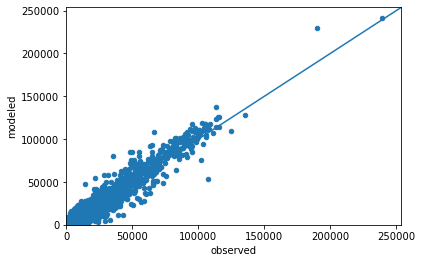

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9634774501415739


---
By County

King r^2: 0.9711200939796498


Kitsap r^2: 0.9356776360972235
Pierce r^2: 0.9645550514886823


Snohomish r^2: 0.9360757155107325


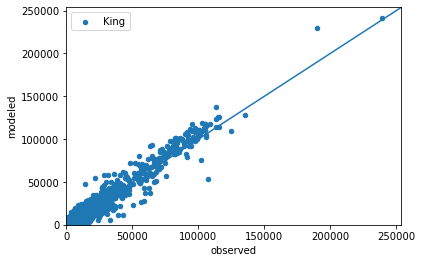

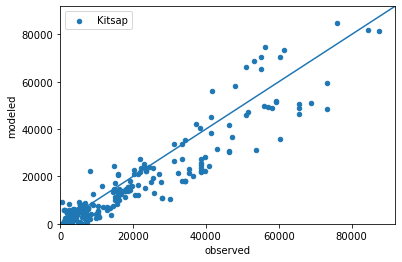

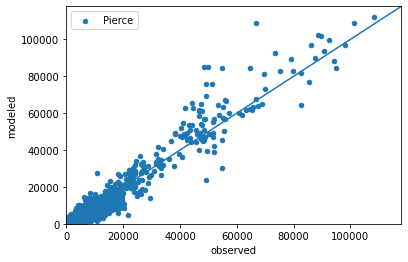

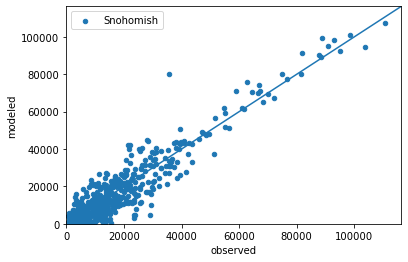

In [16]:
for county in np.unique(df[~df.county.isna()]['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

#### City of SeaTac

Other r^2: 0.9629620562381954
City of SeaTac r^2: 0.9684452069506211


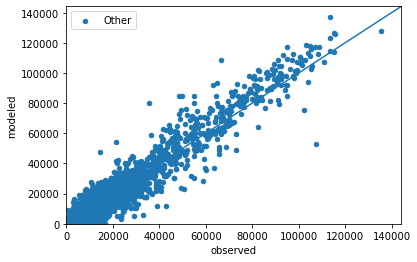

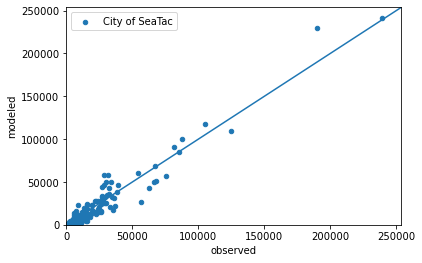

In [17]:
subarea_names = ['Other', 'City of SeaTac']
for county in np.unique(df[~df.county.isna()]['subarea_flag']):
    _df = df[df['subarea_flag'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=str(subarea_names[int(county)]))
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(subarea_names[int(county)]) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.943157130122474
r^2 Arterial: 0.8427919366573425


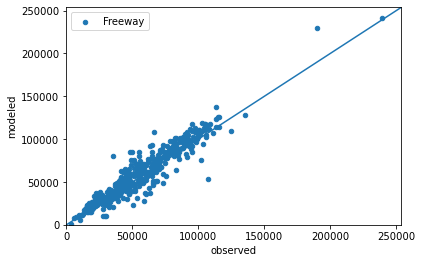

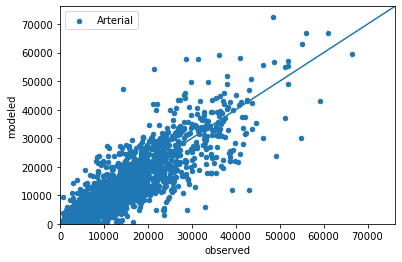

In [18]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - City of SeaTac

r^2 Freeway: 0.9777164614893804
r^2 Arterial: 0.8077853853758971


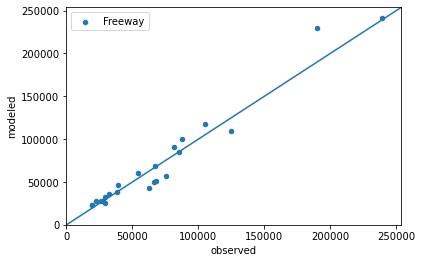

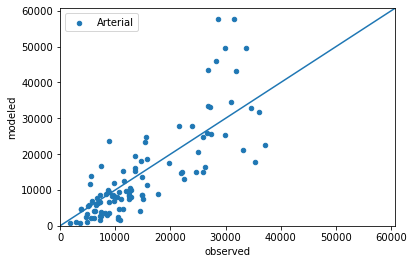

In [19]:
df1 = df[df['subarea_flag'] == 1]
for factype in ['Freeway','Arterial']:
    _df = df1[df1['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Other Counties

r^2 Freeway: 0.935487243897804
r^2 Arterial: 0.8467352674985498


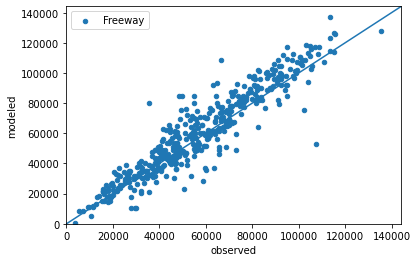

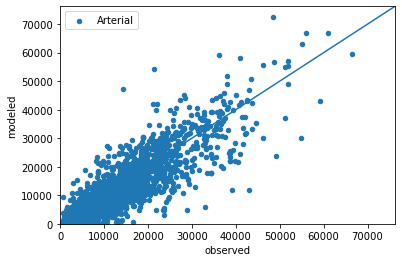

In [20]:
df2 = df[(df['subarea_flag'] != 1) & (~df.county.isna())]
if df2.shape[0] > 0:
    for factype in ['Freeway','Arterial']:
        _df = df2[df2['@facilitytype'] == factype]
        ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
        lim = _df[['observed','modeled']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
        print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9344832075222997


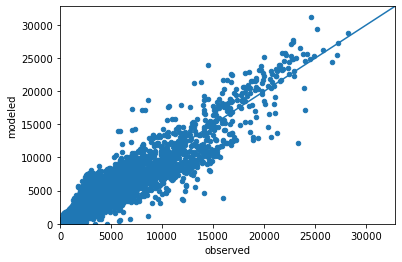

In [21]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - City of SeaTac**

r^2: 0.8962060764712203


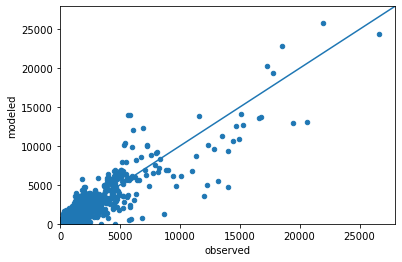

In [22]:
df1 = df[df['subarea_flag'] == 1]
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df1[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Other**

r^2: 0.926759542840754


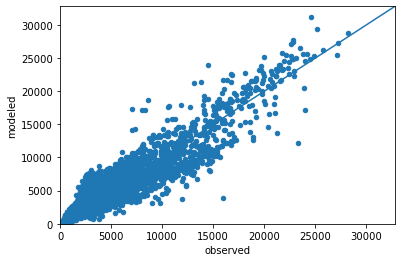

In [23]:
df2 = df[df['subarea_flag'] != 1]
ax = df2.plot(kind='scatter', x='observed', y='modeled')
lim = df2[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
print('r^2: ' + str(r_value))

### Truck Counts

In [24]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_truck_volume.csv'))

##### Medium Trucks

In [25]:
_df = df.groupby('@facilitytype').sum()[['observed_medt','modeled_medt']].rename(columns={'modeled_medt':'modeled','observed_medt':'observed'})
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"10,540","23,256","12,716",120.64%
Arterial,"80,344","59,858","-20,486",-25.50%
Collector,"17,815","3,831","-13,984",-78.50%
Ramp,959,"2,145","1,186",123.77%
Total,"109,658","89,090","-20,568",-18.76%


##### Heavy Trucks

In [26]:
_df = df.groupby('@facilitytype').sum()[['observed_hvyt','modeled_hvyt']].rename(columns={'modeled_hvyt':'modeled','observed_hvyt':'observed'})
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"9,991","21,650","11,659",116.69%
Arterial,"20,683","3,506","-17,177",-83.05%
Collector,"2,030",423,"-1,607",-79.14%
Ramp,249,0,-249,-100.00%
Total,"32,953","25,580","-7,373",-22.37%


##### Total Trucks

In [27]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"20,531","44,906","24,375",118.72%
Arterial,"101,027","63,365","-37,663",-37.28%
Collector,"19,845","4,254","-15,591",-78.56%
Ramp,"1,207","2,145",938,77.69%
Total,"142,611","114,670","-27,941",-19.59%


###### Scatter Plot

r^2: 0.8920036354126224


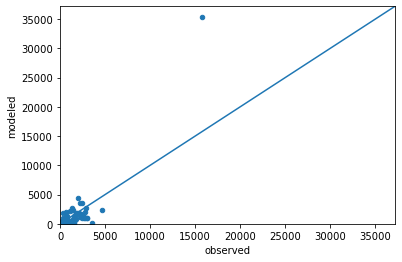

In [28]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [29]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df[~df.name.isin(['KENT','SEATAC'])]
df = df.groupby(['name', 'county'], as_index=False).agg({'observed':'first', 'modeled':'sum'})
df['diff'] = df['modeled'] - df['observed']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df.sort_values(['county','observed'], ascending=[True, False])

,name,county,observed,modeled,diff,percent_diff
1,AUBURN - SOUTH KING,King,"568,417","575,638","7,221",1.27%
23,SEATTLE - SOUTH OF CBD,King,"526,500","524,943","-1,557",-0.30%
24,SHIP CANAL,King,"519,802","552,053","32,251",6.20%
7,KIRKLAND-REDMOND,King,"414,120","418,752","4,632",1.12%
10,MILL CREEK,King,"400,848","409,946","9,098",2.27%
25,SOUTH BELLEVUE,King,"399,500","382,902","-16,598",-4.15%
22,SEATTLE - NORTH,King,"372,000","382,619","10,619",2.85%
2,BOTHELL,King,"293,729","313,238","19,509",6.64%
8,LYNNWOOD-BOTHELL,King,"269,900","290,491","20,591",7.63%
29,TUKWILA,King,"259,341","260,725","1,384",0.53%


r^2 : 0.9925746442448906


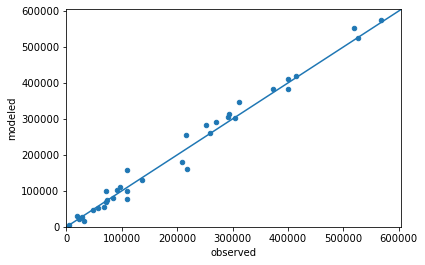

In [30]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - City of Seatac

In [31]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df[~df.name.isin(['KENT','SEATAC'])]
df1 = df[(df['county'] == 'SeaTAC') & (df['name']!='KENT')].drop(columns='subarea_flag')
df1 = df1.groupby(['name', 'county'], as_index=False).agg({'observed':'first', 'modeled':'sum'})
df1['diff'] = df1['modeled'] - df1['observed']
df1 = df1.append(df1.sum(numeric_only=True), ignore_index=True)
df1.at[df1.index[-1], 'name'] = 'TOTAL'
#df1.at['C', 'name'] = 10
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)
df1.sort_values(['county','observed'], ascending=[True, False])

,name,county,observed,modeled,diff,percent_diff
7,S of SEA Airport,SeaTAC,"290,943","304,821","13,878",4.77%
2,N of S 160th St,SeaTAC,"218,251","160,222","-58,029",-26.59%
3,N of S 200th St,SeaTAC,"216,377","256,454","40,077",18.52%
10,W of IH 5,SeaTAC,"208,727","179,127","-29,600",-14.18%
12,W of SR 99,SeaTAC,"109,861","100,047","-9,814",-8.93%
5,S of S 128th St,SeaTAC,"84,474","79,417","-5,057",-5.99%
4,N of SEA Airport,SeaTAC,"66,919","54,228","-12,691",-18.97%
1,Expy/SR 99/Cargo N of S 170th St,SeaTAC,"56,245","53,229","-3,016",-5.36%
6,S of S 144th St,SeaTAC,"48,532","45,686","-2,846",-5.86%
9,W of Des Moines Mem'l N of 176th,SeaTAC,"30,790","17,034","-13,756",-44.68%


r^2 : 0.9727943617445878


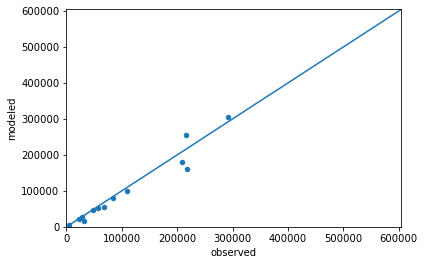

In [32]:
import warnings
warnings.filterwarnings('ignore')
df1 = df1.head(-1)
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Other

In [33]:
df2 = df[(df['county'] != 'SeaTAC') & ((df['name']!='KENT') | (df['name']!='SEATAC'))].drop(columns='subarea_flag').groupby(['name','county'],as_index=False).agg({'observed':'first','modeled':'sum'})
df2['diff'] = df2['modeled']-df2['observed']
df2 = df2.append(df2.sum(numeric_only=True), ignore_index=True)
df2.at[df2.index[-1], 'name'] = 'TOTAL'
#df2.at['C', 'name'] = 10
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)
df2

,name,county,observed,modeled,diff,percent_diff
0,AGATE PASS BRIDGE,Kitsap,"22,000","23,420","1,420",6.46%
1,AUBURN - SOUTH KING,King,"568,417","575,638","7,221",1.27%
2,BOTHELL,King,"293,729","313,238","19,509",6.64%
3,CROSS SOUND,Kitsap,"18,530","28,691","10,161",54.84%
4,GIG HARBOR,Pierce,"71,040","99,059","28,019",39.44%
5,KIRKLAND-REDMOND,King,"414,120","418,752","4,632",1.12%
6,LYNNWOOD-BOTHELL,King,"269,900","290,491","20,591",7.63%
7,MAPLE VALLEY,King,"71,874","69,467","-2,407",-3.35%
8,MILL CREEK,King,"400,848","409,946","9,098",2.27%
9,NORTH KITSAP,Kitsap,"109,890","78,392","-31,498",-28.66%


r^2 : 0.9948685921168774


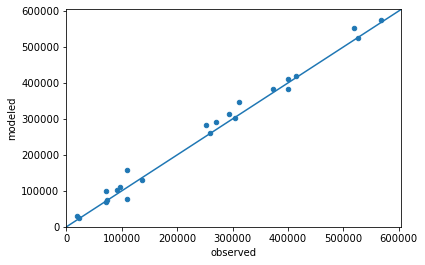

In [34]:
df2 = df2.head(-1)
if df2.shape[0] > 0:
    ax = df2.plot(kind='scatter', x='observed', y='modeled')
    lim = df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
    print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [35]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
sorted_values = df.sort_values('observed_5to20', ascending=False).agency.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df[['perc_diff']] = df['diff']/df['observed_5to20']
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('agency').reindex(sorted_values)

,observed_5to20,modeled_5to20,diff,perc_diff
agency,,,,
King County Metro,"392,694","370,248","-22,446",-5.72%
Sound Transit,"148,468","168,375","19,907",13.41%
Community Transit,"30,918","39,714","8,796",28.45%
Pierce Transit,"27,233","34,453","7,219",26.51%
Washington Ferries,"16,912","12,756","-4,156",-24.57%
Kitsap Transit,"8,669","19,033","10,363",119.54%
Everett Transit,"3,290","2,501",-789,-23.98%
TOTAL,"628,185","647,080","18,895",3.01%


----
### By Transit Routes servicing City of SeaTac

In [36]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_lines_seatac.csv')
df[['route_code']] = df[['route_code']].astype(int).astype('str')
df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df = df[['agency','route_code', 'description', 'observed_5to20','modeled_5to20','diff']]
sorted_values = df.sort_values(['agency','observed_5to20'], ascending=False).route_code.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df.at[df.index[-1], 'route_code'] = 'TOTAL'
df.at[df.index[-1], 'description'] = 'TOTAL'
df[['perc_diff']] = df['diff']/df['observed_5to20']
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('route_code').reindex(sorted_values)

,agency,description,observed_5to20,modeled_5to20,diff,perc_diff
route_code,,,,,,
6996,Sound Transit,LINK: SeaTac - Downt,"69,383","73,693","4,310",6.21%
6590,Sound Transit,590 Tacoma - Seattle,"2,656","3,962","1,306",49.17%
6577,Sound Transit,577 Federal Way - Se,"1,916","1,643",-273,-14.26%
6594,Sound Transit,594 Lakewood - Seatt,"1,828","3,897","2,069",113.21%
6574,Sound Transit,574 Lakewood - SeaTa,"1,768","2,242",475,26.86%
6578,Sound Transit,578 Puyallup - Seatt,"1,686","4,206","2,519",149.38%
6560,Sound Transit,560 Bellevue - Sea-T,"1,681","3,475","1,793",106.67%
6592,Sound Transit,592 Olympia/DuPont -,702,"1,193",491,69.93%
6586,Sound Transit,586 Tacoma - U. Dist,472,57,-414,-87.87%


----
### By Transit Routes servicing Seattle Airport

In [37]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_lines_airport_seatac.csv')
df[['route_code']] = df[['route_code']].astype(int).astype('str')
df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df = df[['agency','route_code', 'description', 'observed_5to20','modeled_5to20','diff']]
sorted_values = df.sort_values(['agency','observed_5to20'], ascending=False).route_code.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df.at[df.index[-1], 'route_code'] = 'TOTAL'
df.at[df.index[-1], 'description'] = 'TOTAL'
df[['perc_diff']] = df['diff']/df['observed_5to20']
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('route_code').reindex(sorted_values)

,agency,description,observed_5to20,modeled_5to20,diff,perc_diff
route_code,,,,,,
6996,Sound Transit,LINK: SeaTac - Downt,"69,383","73,693","4,310",6.21%
6574,Sound Transit,574 Lakewood - SeaTa,"1,768","2,242",475,26.86%
6560,Sound Transit,560 Bellevue - Sea-T,"1,681","3,475","1,793",106.67%
1180,King County Metro,180 Auburn Station -,"3,911","6,429","2,518",64.37%
1156,King County Metro,156 Southcenter - Se,"1,027","1,292",265,25.78%
TOTAL,TOTAL,TOTAL,"77,770","87,130","9,360",12.04%


----
### Key Routes
#### Ferries

In [38]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
sorted_values = _df.sort_values('observed_5to20', ascending=False).description.to_list() + ['TOTAL']
_df = _df.append(_df.sum(numeric_only=True), ignore_index=True)
_df.at[_df.index[-1], 'description'] = 'TOTAL'
_df[['perc_diff']] = _df['diff']/_df['observed_5to20']
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF Seattle - West S,"1,356",518,-837,-61.76%
1,POF Seattle - Vashon,670,449,-221,-32.98%
2,WSF Kingston - Edmon,"1,732",635,"-1,097",-63.35%
3,WSF Bainbridge Islan,"8,857","8,528",-329,-3.71%
4,WSF Bremerton - Seat,"4,484","2,084","-2,400",-53.52%
5,WSF Fauntleroy - Sou,365,12,-353,-96.65%
6,WSF Vashon Island -,946,"1,184",238,25.13%
7,WSF Southworth - Vas,239,149,-90,-37.57%
8,WSF Point Defiance -,289,164,-125,-43.26%
9,TOTAL,"18,937","13,723","-5,214",-27.53%


r^2 : 0.9835733856508726


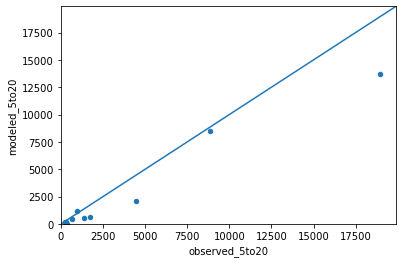

In [39]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [40]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1973,POF West Seattle - S,556
1,1975,POF Vashon Island -,380
2,4200,POF Seattle - Bremer,361
4,4202,POF Bremerton - Anna,321
3,4201,POF Bremerton - Pt O,308
7,5003,WSF Bremerton - Seat,212
8,5005,WSF Vashon Island -,124
10,5007,WSF Point Defiance -,96
9,5006,WSF Southworth - Vas,95
5,5001,WSF Kingston - Edmon,76


#### Rail

In [41]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","73,693","4,310",6.21%
1,Sounder South,"15,356","18,593","3,237",21.08%
2,Sounder North,"1,667","2,717","1,050",62.98%


r^2 : 0.999749018432497


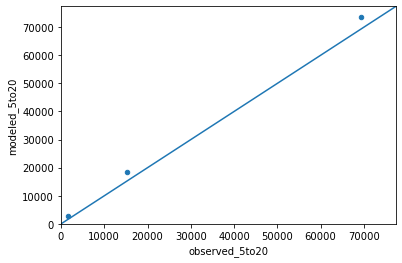

In [42]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [43]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","13,734","-1,602",-10.45%
1,KC Metro 40,"11,405","11,673",268,2.35%
4,C Line RapidRide,"11,368","11,611",243,2.14%
10,Sound Transit 550,"9,168","11,315","2,147",23.42%
5,D Line RapidRide,"13,078","8,571","-4,507",-34.47%
2,A Line RapidRide,"8,522","8,519",-3,-0.04%
0,KC Metro 7,"10,150","8,491","-1,659",-16.34%
7,F Line RapidRide,"5,267","6,729","1,462",27.75%
3,B Line RapidRide,"5,914","5,889",-25,-0.43%
8,SLU Streetcar,"1,703","1,695",-9,-0.50%


r^2 : 0.8944409380844333


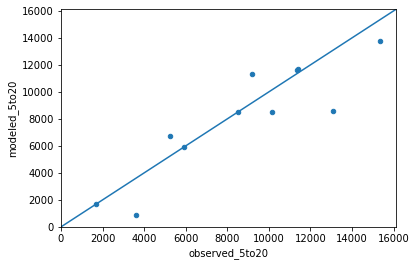

In [44]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.8638506720332219
r^2 Everett Transit: -0.3303493715763131
r^2 King County Metro: 0.9243673348622553
r^2 Kitsap Transit: 0.8115672332747916
r^2 Pierce Transit: 0.8727553943130755
r^2 Sound Transit: 0.9971321424336823


r^2 Washington Ferries: 0.9604120590943575


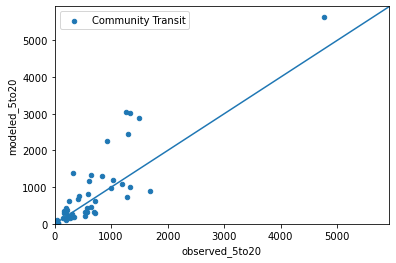

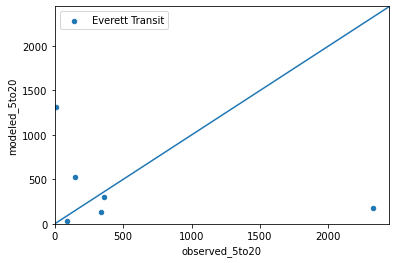

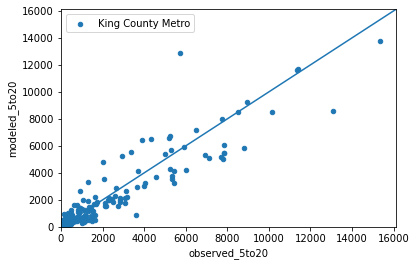

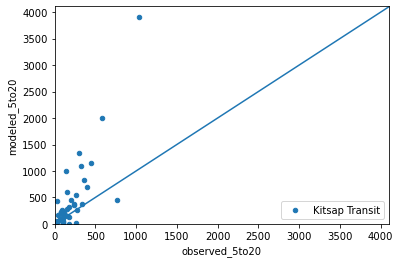

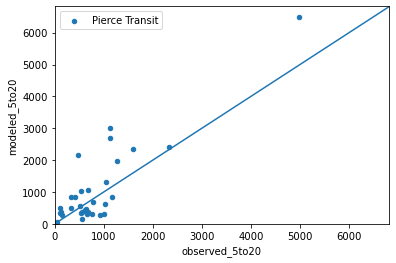

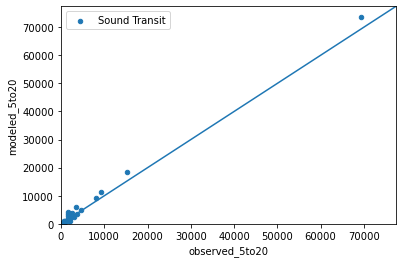

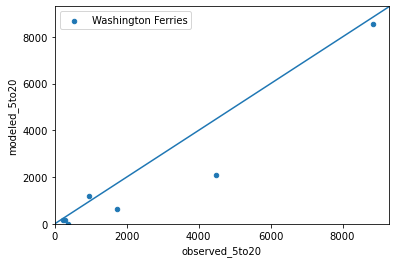

In [45]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [46]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","9,556",141,1.49%
Westlake,"10,904","10,643",-261,-2.39%
University St,"5,257","7,533","2,276",43.30%
Pioneer Square,"3,865","6,376","2,511",64.97%
Int'l District,"5,647","3,891","-1,756",-31.10%
Capitol Hill,"7,016","8,193","1,176",16.76%
Stadium,"1,912","1,291",-621,-32.48%
SODO,"2,108","4,904","2,797",132.71%
Beacon Hill,"2,587","2,181",-407,-15.72%


Sound Transit Station Groupings

In [47]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","9,556",141,1.49%
Capitol Hill,"7,016","8,193","1,176",16.76%
Westlake/University St,"16,161","18,176","2,015",12.47%
Pioneer Square/Int'l District,"9,512","10,267",755,7.93%
Stadium/SODO,"4,020","6,196","2,176",54.13%
Beacon Hill/Mount Baker,"4,809","4,757",-53,-1.09%
Columbia City,"2,376","2,134",-242,-10.18%
Othello/Rainier Beach,"4,412","3,550",-862,-19.55%
Tukwila Int'l Blvd,"2,779","3,046",267,9.60%


# Stop Transfers

### Light Rail

In [48]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.40,-99.00,99.40,-100.41%
Westlake,0.23,0.36,-0.13,-36.81%
University St,0.38,0.20,0.18,90.46%
Pioneer Square,0.40,0.16,0.24,152.64%
Int'l District,0.64,0.45,0.19,43.25%
Capitol Hill,0.05,-99.00,99.05,-100.05%
Stadium,0.23,0.12,0.11,95.87%
SODO,0.37,0.31,0.06,19.60%
Beacon Hill,0.39,0.35,0.04,10.86%


# Externals

In [49]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","123,885","-6,115",-4.70%
I-5 to Mount Vernon,3744,Snohomish,"67,000","53,934","-13,066",-19.50%
I-90 @ Snoqualmie Pass,3739,King,"33,000","27,048","-5,952",-18.04%
SR-532 to Camano Island,3746,Snohomish,"23,000","19,152","-3,848",-16.73%
SR-507 to Yelm,3734,Pierce,"23,000","22,929",-71,-0.31%
SR-3 to Belfair,3749,Kitsap,"18,000","15,077","-2,923",-16.24%
Hood Canal Bridge,3748,Kitsap,"18,000","15,523","-2,477",-13.76%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,964","-1,136",-12.49%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,603",-697,-11.06%


# Corridor Speed

r^2 : 0.6109919810363705


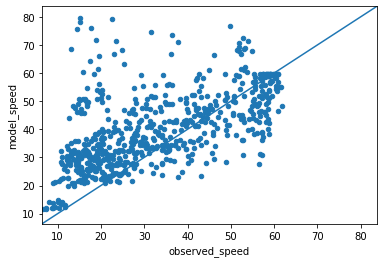

In [50]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df.plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = df[['observed_speed','model_speed']].max().max()*1.05
minlim = df[['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed_speed'],df['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

## City of SeaTac

r^2 : 0.6019239221125635


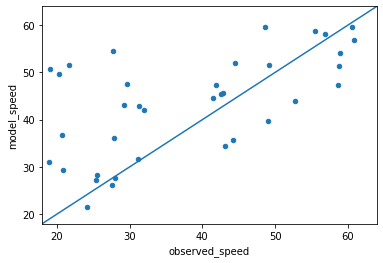

In [51]:
ax = df.loc[df.subarea_flag==1].plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = df.loc[df.subarea_flag==1][['observed_speed','model_speed']].max().max()*1.05
minlim = df.loc[df.subarea_flag==1][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df.subarea_flag==1]['observed_speed'],df[df.subarea_flag==1]['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

## Other Counties

r^2 : 0.6094825889412877


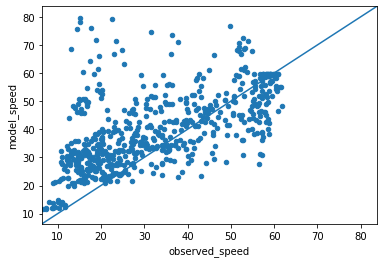

In [52]:
_df = df.loc[df.subarea_flag!=1]
_df = _df.groupby(['Corridor_Number', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda xdf: xdf.length*60/xdf.auto_time)
ax = _df.plot(kind='scatter', y='model_speed', x='observed_speed')
maxlim = _df[['observed_speed','model_speed']].max().max()*1.05
minlim = _df[['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_speed'],_df['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

### AM Peak, Primary Corridors

r^2 : 0.5717713163137255


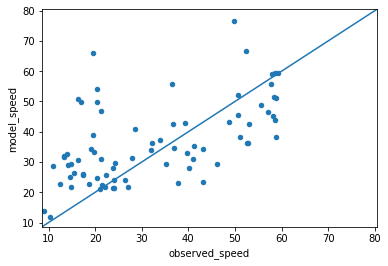

In [53]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '7to8']['observed_speed'],df[df['tod'] == '7to8']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [54]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
538,"SR 161, 264th St to SR 18 - NB",66,20
403,"56th Street/Cirque, Bridgeport to Alaska - EB",51,16
557,"SR 529/Broadway/State, 88th St NE to 41st St - SB",54,20
394,"56th Street/Cirque, Alaska to Bridgeport - WB",50,17
85,Tukwila to Bellevue - NB,50,20
299,"SR 522, I-405 to SR 2 - EB",77,50
367,"15th Ave/Elliott, Western Ave to NW 80th St - NB",47,21
48,Seattle to Tacoma - SB,38,59
102,Bellevue to Tukwila - SB,24,43
359,"SR 9, SR 522 to SR 531 - NB",56,36


## City of SeaTac

r^2 : 0.3810498264042302


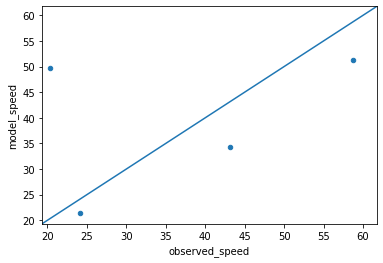

In [55]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag==1]
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '7to8']['observed_speed'],df[df['tod'] == '7to8']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [56]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
85,Tukwila to Bellevue - NB,50,20
103,Bellevue to Tukwila - SB,34,43
49,Seattle to Tacoma - SB,51,59
31,Tacoma to Seattle - NB,21,24


## Other Counties

r^2 : 0.579966757113067


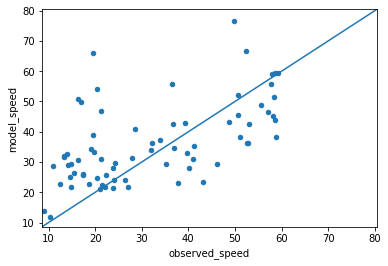

In [57]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag!=1]
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
ax = df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '7to8'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '7to8']['observed_speed'],df[df['tod'] == '7to8']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [58]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
502,"SR 161, 264th St to SR 18 - NB",66,20
367,"56th Street/Cirque, Bridgeport to Alaska - EB",51,16
521,"SR 529/Broadway/State, 88th St NE to 41st St - SB",54,20
358,"56th Street/Cirque, Alaska to Bridgeport - WB",50,17
263,"SR 522, I-405 to SR 2 - EB",77,50
331,"15th Ave/Elliott, Western Ave to NW 80th St - NB",47,21
33,Seattle to Tacoma - SB,38,59
69,Bellevue to Tukwila - SB,24,43
323,"SR 9, SR 522 to SR 531 - NB",56,36
488,"SR 169, Green Valley Rd to I-405 - NB",39,20


### PM Peak, Primary Corridors

r^2 : 0.396529777660864


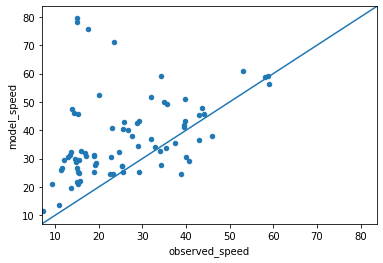

In [59]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '16to17']['observed_speed'],df[df['tod'] == '16to17']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [60]:
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
415,"Juanita/Simonds/100th/Market, Central Way to S...",80,15
444,"196th Street, Poplar Way to Olympic View Dr - WB",78,15
536,"SR 161, 264th St to SR 18 - NB",76,18
297,"SR 522, I-405 to SR 2 - EB",71,24
398,"56th Street/Cirque, Bridgeport to Alaska - EB",47,14
355,"SR 9, SR 522 to SR 531 - NB",53,20
363,"15th Ave/Elliott, Western Ave to NW 80th St - NB",46,14
389,"56th Street/Cirque, Alaska to Bridgeport - WB",46,15
328,"SR 3, SR 303 to Loxie Eagans - SB",59,34
614,"SR 410, SR 165 to SR 167 - WB",52,32


## City of SeaTac

r^2 : 0.7911126139974136


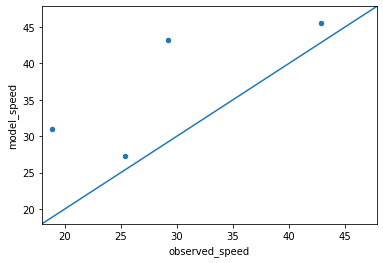

In [61]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag==1]
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '16to17']['observed_speed'],df[df['tod'] == '16to17']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [62]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
75,Tukwila to Bellevue - NB,43,29
93,Bellevue to Tukwila - SB,31,19
21,Tacoma to Seattle - NB,46,43
39,Seattle to Tacoma - SB,27,25


## Other

r^2 : 0.3897895181903938


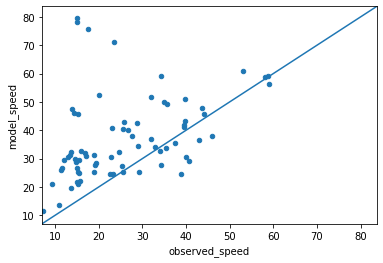

In [63]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df = df.loc[df.subarea_flag!=1]
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
ax = df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')
maxlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].max().max()*1.05
minlim = df[df['tod'] == '16to17'][['observed_speed','model_speed']].min().min()*0.95
ax.set_ylim(minlim,maxlim)
ax.set_xlim(minlim,maxlim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df[df['tod'] == '16to17']['observed_speed'],df[df['tod'] == '16to17']['model_speed'])
print('r^2 ' + str('') + ': ' + str(r_value))

In [64]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'].assign(diff=lambda _df: np.abs(_df.model_speed-_df.observed_speed)).sort_values('diff', ascending=False)[['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
379,"Juanita/Simonds/100th/Market, Central Way to S...",80,15
408,"196th Street, Poplar Way to Olympic View Dr - WB",78,15
500,"SR 161, 264th St to SR 18 - NB",76,18
261,"SR 522, I-405 to SR 2 - EB",71,24
362,"56th Street/Cirque, Bridgeport to Alaska - EB",47,14
319,"SR 9, SR 522 to SR 531 - NB",53,20
327,"15th Ave/Elliott, Western Ave to NW 80th St - NB",46,14
353,"56th Street/Cirque, Alaska to Bridgeport - WB",46,15
292,"SR 3, SR 303 to Loxie Eagans - SB",59,34
578,"SR 410, SR 165 to SR 167 - WB",52,32
